# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

E-news Express, an online news portal, aims to boost new subscriber acquisition by testing a redesigned landing page against the current one. In a controlled A/B test, 100 users were randomly divided into two groups, one experiencing the existing landing page (control) and the other the new page (treatment). The company's objectives are to measure if the new landing page retains users longer, increases conversion rates, explore the impact of user preferred language on conversion, and determine if time spent on the new page varies by language. Statistical analysis at a 5% significance level will guide decisions to enhance the landing page and attract more subscribers.

## Import all the necessary libraries

In [1]:
#import the important packages
import pandas as pd #library used for data manipulation and analysis
import numpy as np # library used for working with arrays.
import matplotlib.pyplot as plt # library for plots and visualisations
import seaborn as sns # library for visualisations
%matplotlib inline 
import scipy.stats as stats # this library contains a large number of probability distributions as well as a growing library of statistical functions.

## Reading the Data into a DataFrame

In [2]:
df = pd.read_csv('/Users/sylviaanthony/Desktop/Sylvia_Python_Prog/Data/abtest.csv' , dtype={"user_id":object } )

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [3]:
print ("No of columns in the data  : ",df.columns.shape[0])
print ("No of rows in the data     : ",df.shape[0] )

No of columns in the data  :  6
No of rows in the data     :  100


In [4]:
df.shape   #Checking the shape of the dataset

(100, 6)

In [5]:
df.head()  #Viewing the first few rows of the dataset

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [6]:
df.tail()   #Viewing the last few rows of the dataset

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    object 
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), object(5)
memory usage: 4.8+ KB


In [8]:
df.describe()  #Getting the statistical summary for the variables

,time_spent_on_the_page
count,100.000000
mean,5.377800
std,2.378166
min,0.190000
25%,3.880000
50%,5.415000
75%,7.022500
max,10.710000


In [9]:
df.columns.isnull().sum()  # checking for missing values

0

In [10]:
df.duplicated().sum()   #Checking for duplicates

0

In [11]:
df.columns

Index(['user_id', 'group', 'landing_page', 'time_spent_on_the_page',
       'converted', 'language_preferred'],
      dtype='object')

### Univariate Analysis

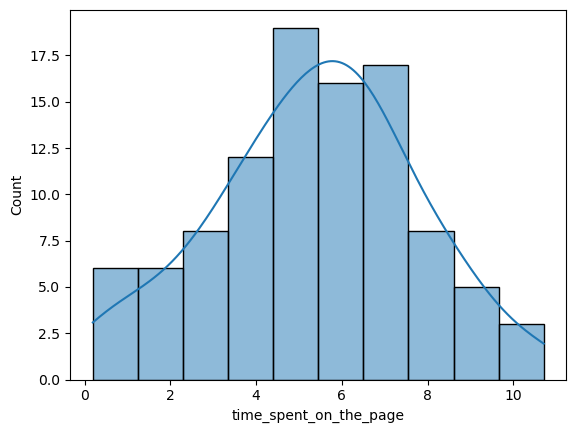

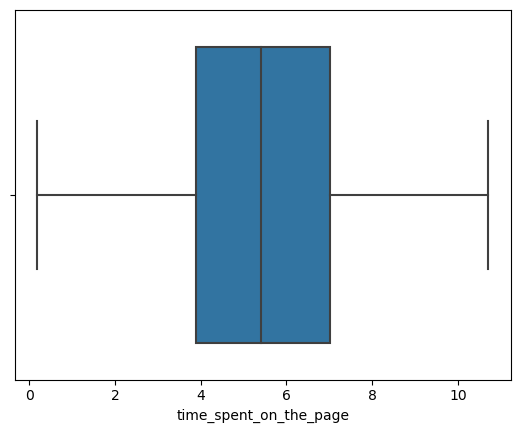

In [12]:
sns.histplot(data=df,x='time_spent_on_the_page',stat = 'count',bins = 10,kde=True)
plt.show()
sns.boxplot(data=df,x='time_spent_on_the_page')
plt.show()


In [13]:
#### Observation :  Time spent on the page follows a normal distribution

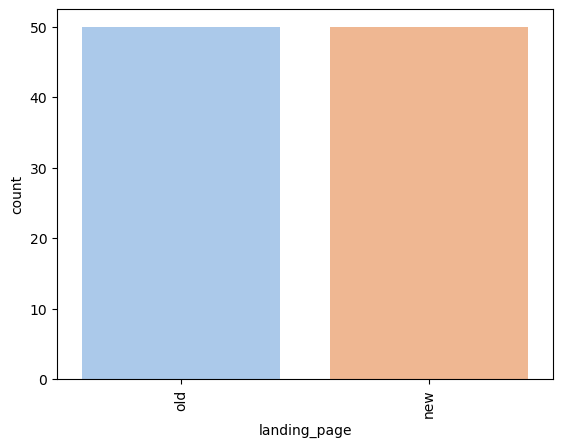

In [14]:
sns.countplot(data=df,x='landing_page' ,palette = "pastel" )
plt.xticks(rotation=90)
plt.show()

In [15]:
## Observation :  The sample seems to be distributed between old and new landing page 

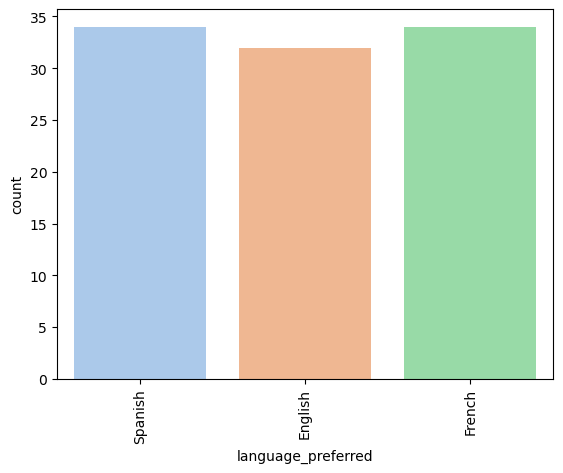

In [16]:
sns.countplot(data=df,x='language_preferred' ,palette = "pastel" )
plt.xticks(rotation=90)
plt.show()

In [17]:
#### Observation :  The sample users seems to be distributed between Spanish, French and English

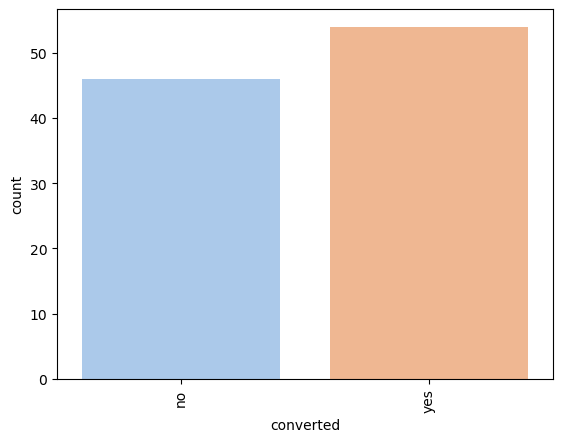

In [18]:
sns.countplot(data=df,x='converted' ,palette = "pastel" )
plt.xticks(rotation=90)
plt.show()

## Observation :  The more than 50% of the users have been converted as sample size is 100

sns.countplot(data=df,x='group' ,palette = "pastel"  )
plt.xticks(rotation=90)
plt.show()

#### Observation :  The sample contains 50% of users in control group and 50% in treatment group

### Bivariate Analysis

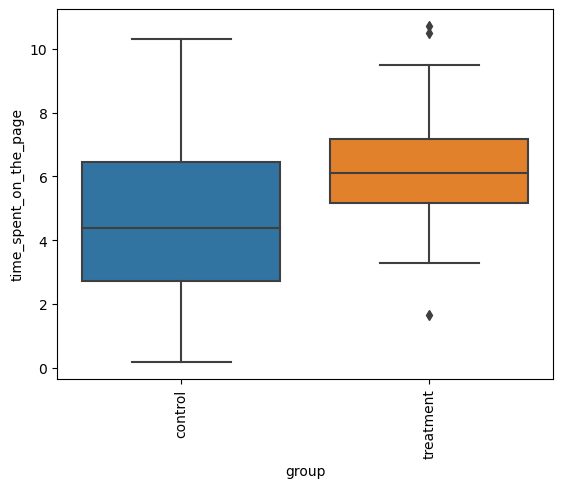

In [19]:
sns.boxplot(data=df,x='group',y='time_spent_on_the_page' )
plt.xticks(rotation=90)
plt.show();

#### Observation :  The  treatment group has higher median time spent on the page as compared to control group

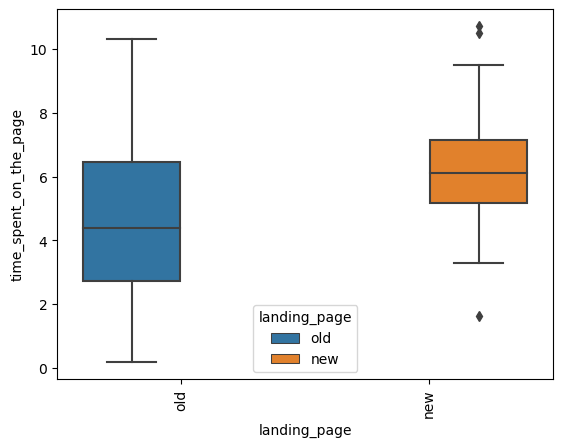

In [20]:
sns.boxplot(data=df,x='landing_page',y='time_spent_on_the_page' , hue='landing_page')
plt.xticks(rotation=90)
plt.show();

#### Observation :  The  new landing page has higher median time spent on the page as compared to old landing page

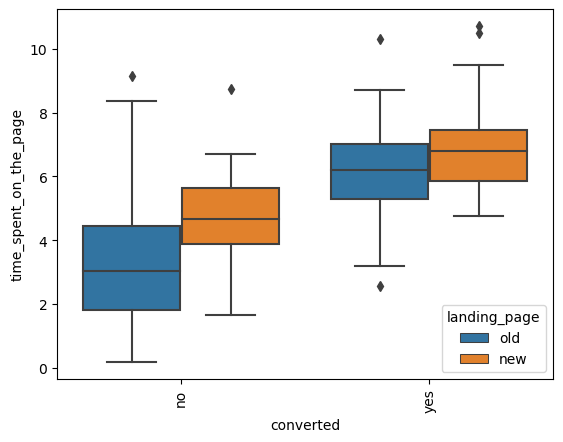

In [21]:
sns.boxplot(data=df,x='converted',y='time_spent_on_the_page' ,  hue='landing_page')
plt.xticks(rotation=90)
plt.show();

In [22]:
#### Observation :  The  converted users spend more time on the page of which new landing page users have the higest median time 

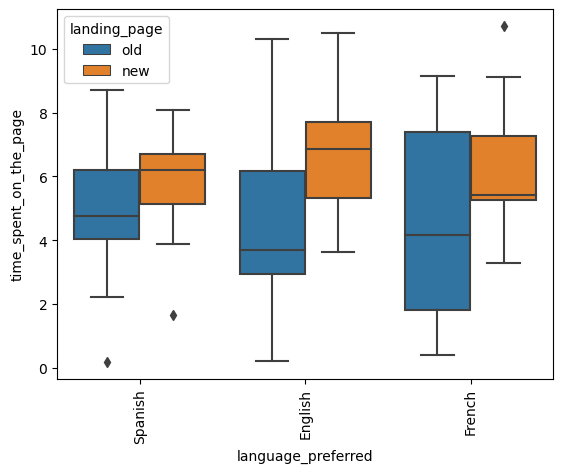

In [23]:
sns.boxplot(data=df,x='language_preferred',y='time_spent_on_the_page' , hue= 'landing_page')
plt.xticks(rotation=90)
plt.show();

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

In [24]:
# mean of carbon emission at different levels of the fuel_type factor
print(df.groupby("landing_page")["time_spent_on_the_page"].mean())


landing_page
new    6.2232
old    4.5324
Name: time_spent_on_the_page, dtype: float64


In [25]:
print(round(df.groupby("landing_page")["time_spent_on_the_page"].std(),2))

landing_page
new    1.82
old    2.58
Name: time_spent_on_the_page, dtype: float64


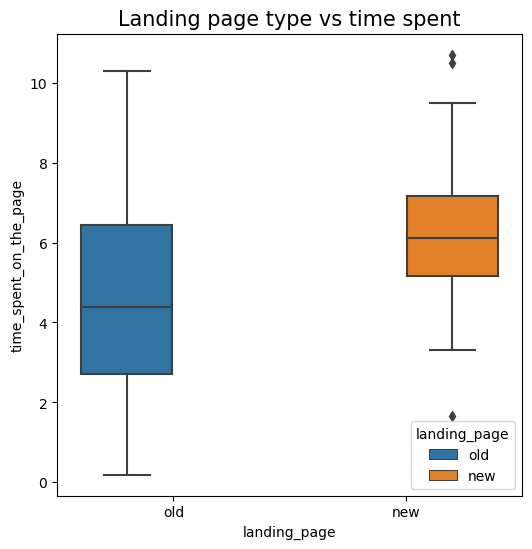

In [26]:
# draw the boxplot for visualization 
fig, ax = plt.subplots(figsize = (6,6))
a = sns.boxplot(x= "landing_page", y = 'time_spent_on_the_page' , data = df, hue = 'landing_page')
a.set_title("Landing page type vs time spent", fontsize=15)
plt.show()

### Step 1: Define the null and alternate hypotheses

We will test the null hypothesis

>$H_0:\mu_1=\mu_2$

against the alternate hypothesis

>$H_a:\mu_1\  >  \mu_2$

### Step 2: Select Appropriate test

In [27]:
w, p_value = stats.shapiro(df['time_spent_on_the_page']) 
print('The p-value is', p_value)
print('The p-value is large so we can confirm that the data is normally distributed')

The p-value is 0.5643359422683716
The p-value is large so we can confirm that the data is normally distributed


#### Test whether the T-test assumptions are satisfied or not:

Continuous data - Yes, the usage time is measured on a continuous scale.

Normally distributed populations - Yes, we have confirmation that the populations are assumed to be normal as per Shapiro test

Independent populations - As we are taking random samples for two different type of users, the two samples are from two independent populations.

Unequal population standard deviations - As the sample standard deviations are different, the population standard deviations may be assumed to be different.

Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.
Voila! We can use two sample T-test for this problem.


### Step 3: Decide the significance level

significance level $\alpha$ of 5% as per the problem statement

In [28]:
𝛼=0.05

### Step 4: Collect and prepare data

In [29]:
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [30]:
# ttest_ind() function of Scipy will be used to compute the test statistic and p-value.


#import the required functions
from scipy.stats import ttest_ind

# find the p-value
test_stat, p_value = ttest_ind(df.loc[(df['landing_page']=='new'),['time_spent_on_the_page']],
                               df.loc[(df['landing_page']=='old'),['time_spent_on_the_page']],
                               equal_var = False, alternative = 'greater')




### Step 5: Calculate the p-value

In [31]:
print('The p-value is ', p_value)

The p-value is  [0.00013924]


### Step 6: Compare the p-value with $\alpha$

In [32]:
print('The p-value is ', p_value , 'and 𝛼 is' , 𝛼 )
print('The p-value is much lesser than 𝛼 , hence we reject the null hypothesis ')  

The p-value is  [0.00013924] and 𝛼 is 0.05
The p-value is much lesser than 𝛼 , hence we reject the null hypothesis 


### Step 7:  Draw inference

####  As p-value is much lesser than 𝛼 ,we reject the null hypothesis and accept the alternate hypothesis that users are spending more time on the new landing page.

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

### Perform Visual Analysis

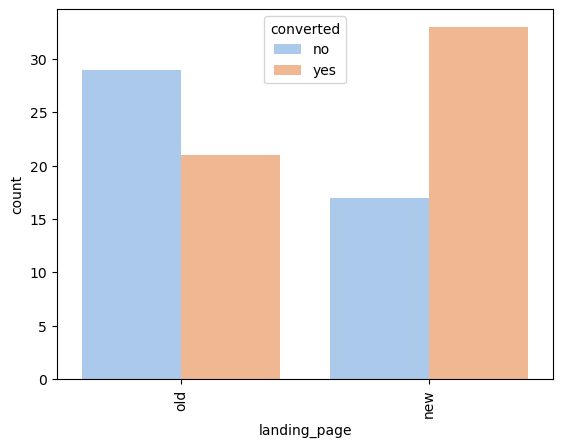

In [33]:
sns.countplot(data=df,x='landing_page' ,palette = "pastel"  , hue='converted')
plt.xticks(rotation=90)
plt.show()

In [34]:
viz2 = df.groupby(['landing_page'])['converted'].value_counts().unstack(fill_value=None)
viz2

converted,no,yes
landing_page,,
new,17,33
old,29,21


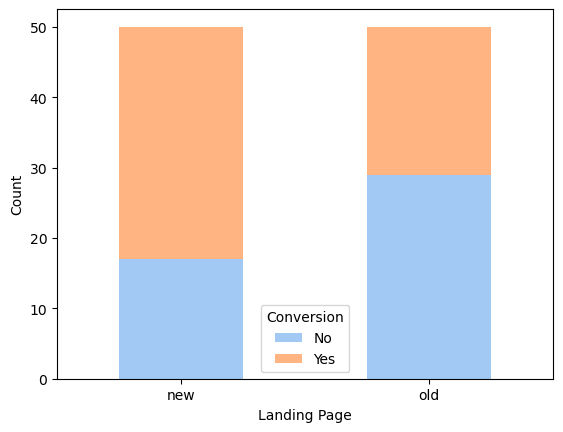

In [35]:
# Create the stacked bar chart
viz2.plot(kind='bar', stacked=True, color=sns.color_palette("pastel"))

plt.xlabel('Landing Page')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Conversion', labels=['No', 'Yes'])
plt.show()


In [36]:
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


We will test the null hypothesis

>$H_0:p_1 =p_2$

against the alternate hypothesis

>$H_a:p_1 > p_2$

### Step 2: Select Appropriate test

Let's test whether the Z-test assumptions are satisfied or not¶

Binomally distributed population - Yes, a conversion is either a yes or no

Random sampling from the population - Yes, the collected sample is a simple random sample.

Can the binomial distribution approximated to normal distribution - Yes.

For binary data, CLT works slower than usual. The standard thing is to check whether np and n(1-p) are greater than or equal to 10. 

In [37]:
df.loc[(df['converted']=='yes') & (df['landing_page']=='new'),['converted']].count()  # checking for p1

converted    33
dtype: int64

In [38]:
df.loc[(df['landing_page']=='new'),['converted']].count()  # checking for n1

converted    50
dtype: int64

In [39]:
df.loc[(df['converted']=='yes') & (df['landing_page']=='old'),['converted']].count()   # checking for p2

converted    21
dtype: int64

In [40]:
df.loc[(df['landing_page']=='old'),['converted']].count()  # checking for n1

converted    50
dtype: int64

In [41]:
# Assigning the variables with values for calculation

p1=33/50
p2=21/50
n1=50
n2=50

In [42]:
n1*p1

33.0

In [43]:
n1*(1-p1)

17.0

In [44]:
n2*p2

21.0

In [45]:
n2*(1-p2)

29.000000000000004

### Step 3: Decide the significance level

significance level $\alpha$ of 5% as per the problem statement

In [46]:
𝛼=0.05

### Step 4: Collect and prepare data

In [47]:
# import the required fuction
from statsmodels.stats.proportion import proportions_ztest

# set the counts of defective items
defect_count = np.array([33, 21])

# set the sample sizes
nobs = np.array([50, 50])

# find the p-value
test_stat, p_value = proportions_ztest(defect_count, nobs,alternative ='larger')
print('The p-value is ' + str(p_value))

The p-value is 0.008026308204056278


### Step 5: Calculate the p-value

In [48]:
print('The p-value is ', p_value)

The p-value is  0.008026308204056278


### Step 6: Compare the p-value with $\alpha$

In [49]:
print('The p-value is ', p_value , 'and 𝛼 is' , 𝛼 )
print('The p-value is much lesser than 𝛼 , hence we reject the null hypothesis ')  

The p-value is  0.008026308204056278 and 𝛼 is 0.05
The p-value is much lesser than 𝛼 , hence we reject the null hypothesis 


### Step 7:  Draw inference

#### As p-value is much lesser than 𝛼 ,we reject the null hypothesis and accept the alternate hypothesis that the proportion of conversion rate for the new page is greater than the old landing page

## 3. Is the conversion and preferred language are independent or related?

### Perform Visual Analysis

In [50]:
viz3 = df.groupby(['language_preferred'])['converted'].value_counts().unstack(fill_value=None)
viz3

converted,no,yes
language_preferred,,
English,11,21
French,19,15
Spanish,16,18


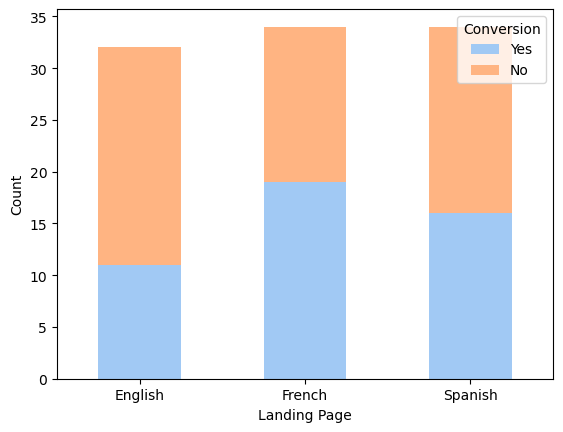

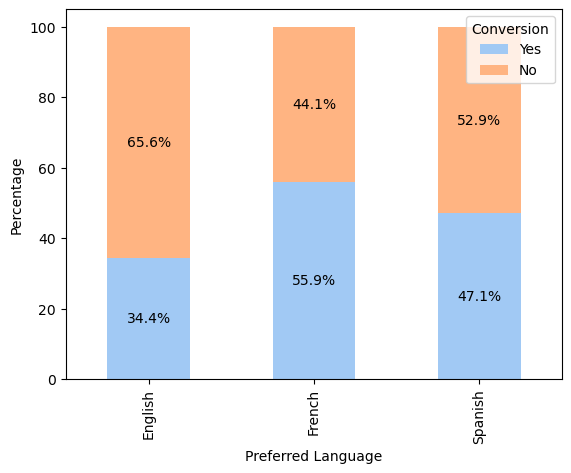

In [51]:
# Create the stacked bar chart
viz3.plot(kind='bar', stacked=True, color=sns.color_palette("pastel"))
plt.xlabel('Landing Page')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Conversion', labels=['Yes', 'No'])
plt.show


# Normalize counts to percentages
viz3_percent = viz3.div(viz3.sum(axis=1), axis=0) * 100

# Create a percentage stacked bar chart
ax = viz3_percent.plot(kind='bar', stacked=True, color=sns.color_palette("pastel"))

# Annotate bars with percentage values
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center')

# Add labels and legend
plt.xlabel('Preferred Language')
plt.ylabel('Percentage')
plt.legend(title='Conversion', labels=['Yes', 'No'])

# Show the chart
plt.show()



### Step 1: Define the null and alternate hypotheses

We will test the null hypothesis

>$H_0$ : conversion and preffered language are independent

against the alternate hypothesis

>$H_a$ : conversion and preffered language are dependent

### Step 2: Select Appropriate test

### Let's test whether the assumptions are satisfied or not

* Categorical variables - Yes
* Expected value of the number of sample observations in each level of the variable is at least 5 - Yes, the number of observations in each level is greater than 5.
* Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.


### Step 3: Decide the significance level

significance level of $\alpha$ 5% as per the problem statement

In [52]:
𝛼=0.05

### Step 4: Collect and prepare data

In [53]:
pivot_table = pd.pivot_table(df, index='converted', columns='language_preferred', values='time_spent_on_the_page',aggfunc='count')
pivot_table

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


In [54]:
grouped = df.groupby(['converted'])['language_preferred'].value_counts().unstack(fill_value=None)
grouped

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


In [55]:
# import the required function
from scipy.stats import chi2_contingency

# find the p-value
chi, p_value, dof, expected = chi2_contingency(grouped)
print('The p-value is', p_value)

The p-value is 0.21298887487543447


### Step 5: Calculate the p-value

In [56]:
print('The p-value is ', p_value)

The p-value is  0.21298887487543447


### Step 6: Compare the p-value with $\alpha$

In [57]:
print('The p-value is ', p_value , 'and 𝛼 is' , 𝛼 )

if p_value < 𝛼 :
    print('As the p-value is less than level of significance, we reject the null hypothesis.')
else:
    print('As the p-value is greater than level of significance, we fail to reject the null hypothesis.')

The p-value is  0.21298887487543447 and 𝛼 is 0.05
As the p-value is greater than level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

As the p_value is greater than level of significance converted and language_preferred are independent of each other 

## 4. Is the time spent on the new page same for the different language users?

### Perform Visual Analysis

In [58]:
df1=df.loc[df['landing_page']=='new']
df1.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
4,546459,treatment,new,4.75,yes,Spanish
6,546448,treatment,new,5.25,yes,French
8,546461,treatment,new,10.71,yes,French


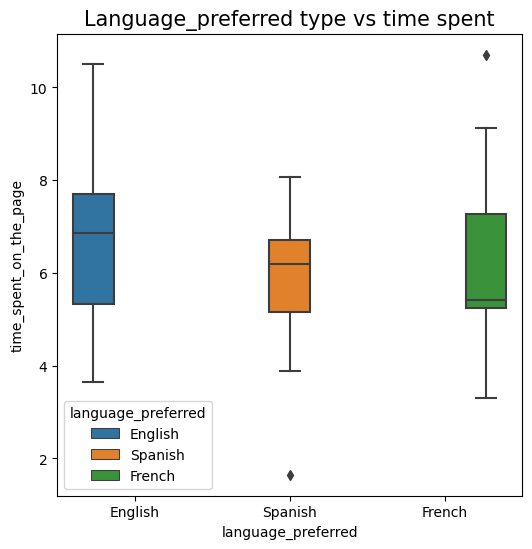

In [59]:
fig, ax = plt.subplots(figsize = (6,6))
a = sns.boxplot(x= "language_preferred", y = 'time_spent_on_the_page' , data = df1, hue = 'language_preferred')
a.set_title("Language_preferred type vs time spent", fontsize=15)
plt.show()

### Step 1: Define the null and alternate hypotheses

### Let's write the null and alternative hypothesis

Let $\mu_1, \mu_2, \mu_3$ be the means of time_spent_on_the_page by different languages preffered.

We will test the null hypothesis

>$H_0: \mu_1 = \mu_2 = \mu_3$

against the alternative hypothesis

>$H_a: $ At least one means of time_spent_on_the_page by different languages preffered is different from the rest.

### Step 2: Select Appropriate test

Normality and equality of variance assumptions need to be checked.

For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

For equality of variance, Levene test is applied to the response variable.

### Shapiro-Wilk’s test

We will test the null hypothesis

>$H_0:$ time_spent follows a normal distribution against

against the alternative hypothesis

>$H_a:$ time_spent does not follow a normal distribution

In [60]:
# Assumption 1: Normality
# import the required function
from scipy import stats

# find the p-value
w, p_value = stats.shapiro(df1['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.8040016293525696


In [61]:
if p_value < 0.05 :
    print('As the p-value is less than 0.05,we reject the null hypothesis that the response follows the normal distribution.')
else:
    print('As the p-value is greater than 0.05, we  fail to reject the null hypothesis that the response follows the normal distribution.')

As the p-value is greater than 0.05, we  fail to reject the null hypothesis that the response follows the normal distribution.


### Levene’s test

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [62]:
#Assumption 2: Homogeneity of Variance
#import the required function
from scipy.stats import levene
statistic, p_value = levene( df1['time_spent_on_the_page'][df1['language_preferred']=="English"], 
                                   df1['time_spent_on_the_page'][df1['language_preferred']=="French"], 
                                   df1['time_spent_on_the_page'][df1['language_preferred']=="Spanish"])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.46711357711340173


In [63]:
if p_value < 0.05 :
    print('As the p-value is less than 0.05,we  reject the null hypothesis of homogeneity of variances.')
else:
    print('As the p-value is greater than 0.05, we fail to reject the null hypothesis of homogeneity of variances')

As the p-value is greater than 0.05, we fail to reject the null hypothesis of homogeneity of variances


Let's test whether the assumptions are satisfied or not

The populations are normally distributed - Yes, the normality assumption is verified using the Shapiro-Wilk’s test.

Samples are independent simple random samples - Yes, the collected sample is a simple random sample.

Population variances are equal - Yes, the homogeneity of variance assumption is verified using the Levene's test.

### Step 3: Decide the significance level

significance level of $\alpha$ 5% as per the problem statement

In [64]:
𝛼=0.05

### Step 4: Collect and prepare data

In [65]:
#import the required function
from scipy.stats import f_oneway

# perform one-way anova test
test_stat, p_value = f_oneway(df1.loc[df['language_preferred'] == 'English', 'time_spent_on_the_page'],
                              df1.loc[df['language_preferred'] == 'French', 'time_spent_on_the_page'],
                              df1.loc[df['language_preferred'] == 'Spanish', 'time_spent_on_the_page'])
print('The p-value is ' + str(p_value))

The p-value is 0.43204138694325955


### Step 5: Calculate the p-value

In [66]:
print('The p-value is ', p_value)

The p-value is  0.43204138694325955


### Step 6: Compare the p-value with $\alpha$

In [67]:
print('The p-value is ', p_value , 'and 𝛼 is' , 𝛼 )
if p_value < 𝛼 :
    print('As the p-value is less than level of significance, we reject the null hypothesis.')
else:
    print('As the p-value is greater than level of significance, we fail to reject the null hypothesis.')

The p-value is  0.43204138694325955 and 𝛼 is 0.05
As the p-value is greater than level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

As the p-value is greater than level of significance, we fail to reject the null hypothesis , thus the mean time spent by different preffered languages are not different

## Conclusion and Business Recommendations

To assess whether users spend more time on the new landing page compared to the existing one, a two-sample independent t-test was conducted. The resulting p-value, at 0.0001, fell significantly below the 5% significance threshold, leading to the rejection of the null hypothesis. This signifies strong evidence that, within this context, the average time users spend on the new landing page is greater than that on the old page.

To determine if the conversion rate on the new page surpasses that of the old page, a two-proportion z-test was employed. The test yielded a p-value of 0.008, lower than the 5% significance level, resulting in the null hypothesis being rejected. This implies compelling evidence that the new landing page exhibits a higher conversion rate compared to the old one.

Regarding the relationship between conversion status and preferred language, a chi-square test for independence was executed. The p-value, at 0.213, exceeded the 5% significance level, leading to the retention of the null hypothesis. In this context, it suggests that conversion status and preferred language are independent variables and not significantly related to each other.

Analyzing whether time spent on the new landing page differs among users with different preferred languages, a one-way ANOVA test was conducted. The p-value of 0.432 exceeded the 5% significance threshold, indicating the null hypothesis should not be rejected. Therefore, it suggests that, in this context, the mean time spent on the new landing page remains relatively consistent across all preferred languages.

___